## Notebook to broswe the detected eQTL result for items of interest

#### import libraries and set notebook variables

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# parameters
cohort = 'foundin'
day = 'da65'

In [3]:
# naming
cohort_build = f'{cohort}.{day}'
geno_version = 'amppdv1'
cohort_version = f'{cohort}.{geno_version}'

# directories
wrk_dir = f'/home/jupyter/{cohort}/eqtl'
expr_dir = f'{wrk_dir}/expression'
genos_dir = f'{wrk_dir}/genotypes'
info_dir = f'{wrk_dir}/sample_info'
tensorqtl_dir = f'{wrk_dir}/tensorqtl'
results_dir = f'{wrk_dir}/results'
gwas_dir = f'{wrk_dir}/gwas'

# input files
gencode_pkl = f'{expr_dir}/gencode_v29.lncipedia_v5_2_hc.annotation.pkl'
eqtl_results_file = f'{results_dir}/{cohort_build}.cis.indep.csv'

# output files
eqtl_psam = f'{info_dir}/{cohort_build}.psam'

# constant values
autosomes = [str(x) for x in list(range(1,23))]
max_dist = 1000000
max_threads = 24
alpha_value = 0.05

# items of interest
genes = ['SNCA', 'LRRK2', 'GBA', 'CHURC1', 'CAMLG']
# meta5_cojo_file = f'{gwas_dir}/pd_meta5v2_cojo_results.jma.cojo.csv'
meta5_st2_clean_file = f'{gwas_dir}/pd.table_s2.clean.txt'

#### load the gencode annotations

In [4]:
%%time
gencode_df = pd.read_pickle(gencode_pkl)
print(gencode_df.shape)
# chr_lengths_df = pd.read_csv(genome_index_file, header=None, sep='\t')
# print(chr_lengths_df.shape)

(3072652, 50)
CPU times: user 6.87 s, sys: 2.84 s, total: 9.71 s
Wall time: 9.91 s


#### load the detected eQTL

In [5]:
eqtl_df = pd.read_csv(eqtl_results_file)
print(eqtl_df.shape)
number_genes = len(eqtl_df['phenotype_id'].unique())
print(f'detected eqtl for {number_genes} genes')
eqtl_df.head()

(187, 19)
detected eqtl for 186 genes


Unnamed: 0        phenotype_id  num_var  beta_shape1  beta_shape2  \
0           0         lnc_POLE4_8     5622     1.058390    504.58627   
1           1         lnc_ZC3H3_2     6219     0.998992    489.89780   
2           2  ENSG00000112031.15     7696     1.528979    337.11140   
3           3        lnc_GSTT2B_4     6537     1.261770    263.29437   
4           4           FLVCR1_DT     6515     1.431431    275.67484   

     true_df  pval_true_df  variant_id  tss_distance  ma_samples  ma_count  \
0  72.114020  1.110771e-08     rs12366         49815          66        84   
1  75.670480  5.585333e-08  rs10101193        -17649          63        89   
2  43.080994  1.175138e-05   rs9322407         -7045          53        62   
3  46.991720  1.808320e-09  rs11287675          1671          66        79   
4  43.024770  2.294199e-09   rs2047287         32287          58        83   

        maf  ref_factor  pval_nominal     slope  slope_se  pval_perm  \
0  0.461538           1  2.144663e-10  0.875924  0.122218     0.0001   
1  0.489011           1  3.783036e-09 -0.745568  0.114011     0.0001   
2  0.340659           1  2.672147e-10  0.941491  0.132244     0.0001   
3  0.434066           1  1.075191e-16 -1.179689  0.115319     0.0001   
4  0.456044           1  6.797843e-18  0.944256  0.087321     0.0001   

      pval_beta  rank  
0  2.696240e-06     1  
1  2.766514e-05     1  
2  1.563476e-04     1  
3  9.243415e-09     1  
4  1.056531e-09     1

#### grab the max pval_nominal and max pval_beta

In [6]:
max_pvalue = eqtl_df['pval_nominal'].max()
max_pval_beta = eqtl_df['pval_beta'].max()
print(f'max p-value: {max_pvalue} and p-values(beta): {max_pval_beta}')

max p-value: 3.58454252203882e-08 and p-values(beta): 0.0002779023281228


In [7]:
genes_oi_df = gencode_df.loc[gencode_df['gene_name'].isin(genes)]
print(genes_oi_df.shape)
gene_ids = genes_oi_df['gene_id'].unique()
print(gene_ids)
gene_names = genes_oi_df['gene_name'].unique()
print(gene_names)
genes_oi_df.head()

(809, 50)
['ENSG00000188906.15' 'ENSG00000258289.8' 'ENSG00000177628.15'
 'ENSG00000145335.15' 'ENSG00000164615.4']
['LRRK2' 'CHURC1' 'GBA' 'SNCA' 'CAMLG']


seqname  source feature     start       end score strand frame   ID  \
325235   chr12  HAVANA     CDS  40225132  40225282     .      +     0  NaN   
325236   chr12  HAVANA     CDS  40225132  40225282     .      +     0  NaN   
325237   chr12  HAVANA     CDS  40225188  40225282     .      +     1  NaN   
325238   chr12  HAVANA     CDS  40225555  40225640     .      +     2  NaN   
325239   chr12  HAVANA     CDS  40225555  40225640     .      +     2  NaN   

             ccdsid  ... transcript_alias_4 transcript_alias_5  \
325235  CCDS31774.1  ...                NaN                NaN   
325236          NaN  ...                NaN                NaN   
325237          NaN  ...                NaN                NaN   
325238  CCDS31774.1  ...                NaN                NaN   
325239          NaN  ...                NaN                NaN   

       transcript_alias_6 transcript_alias_7 transcript_alias_8  \
325235                NaN                NaN                NaN   
325236                NaN                NaN                NaN   
325237                NaN                NaN                NaN   
325238                NaN                NaN                NaN   
325239                NaN                NaN                NaN   

       transcript_alias_9       transcript_id transcript_name  \
325235                NaN  ENST00000298910.11       LRRK2-201   
325236                NaN   ENST00000343742.6       LRRK2-202   
325237                NaN   ENST00000644108.1       LRRK2-209   
325238                NaN  ENST00000298910.11       LRRK2-201   
325239                NaN   ENST00000343742.6       LRRK2-202   

       transcript_support_level          transcript_type  
325235                        1           protein_coding  
325236                        5           protein_coding  
325237                      NaN  nonsense_mediated_decay  
325238                        1           protein_coding  
325239                        5           protein_coding  

[5 rows x 50 columns]

In [8]:
eqtl_genes_oi_df = eqtl_df.loc[eqtl_df['phenotype_id'].isin(genes_oi_df['gene_id'])]
print(eqtl_genes_oi_df.shape)
print(eqtl_genes_oi_df['phenotype_id'].unique())
print(genes_oi_df.loc[genes_oi_df['gene_id'].isin(eqtl_genes_oi_df['phenotype_id']), 
                      ['gene_name']]['gene_name'].unique())

(1, 19)
['ENSG00000258289.8']
['CHURC1']


#### load the variants of interest

In [9]:
variants_oi_df = pd.read_csv(meta5_st2_clean_file, sep='\t')
print(variants_oi_df.shape)
variants_oi_df.head()

(91, 12)


SNP  CHR         BP Nearest_Gene QTL_Nominated_Gene Effect_allele  \
0  rs114138760    1  154898185         PMVK                NaN             c   
1   rs35749011    1  155135036      KRTCAP2              EFNA3             a   
2   rs76763715    1  155205634        GBAP1                NaN             t   
3    rs6658353    1  161469054       FCGR2A             FCGR2A             c   
4   rs11578699    1  171719769        VAMP4              VAMP4             t   

  Other_allele     EAF  Beta_all_studies  SE_all_studies  P_all_studies  \
0            g  0.0112            0.2812          0.0478   4.190000e-09   
1            g  0.0169            0.6068          0.0342   1.720000e-70   
2            c  0.9953           -0.7467          0.0765   1.590000e-22   
3            g  0.5011            0.0650          0.0094   6.100000e-12   
4            c  0.1949           -0.0704          0.0120   4.470000e-09   

   P_COJO_all_studies  
0        1.090000e-08  
1        3.820000e-77  
2        9.900000e-23  
3        4.690000e-12  
4        4.450000e-09

#### see if any of the independent significant results happen to be risk independent variants

In [10]:
def check_eqtls_for_variants(eqtl_df, variants_df, gencode_df):
    eqtl_variants_oi_df = eqtl_df.loc[eqtl_df['variant_id'].isin(variants_df['SNP'])]
    print(eqtl_variants_oi_df.shape)
    this_cnt = len(eqtl_variants_oi_df['variant_id'].unique())
    print(f'variants {this_cnt}')
    print(eqtl_variants_oi_df['variant_id'].unique())
    this_cnt = len(eqtl_variants_oi_df['phenotype_id'].unique())
    print(f'genes {this_cnt}')
    oi_genes = gencode_df.loc[gencode_df['gene_id'].isin(eqtl_variants_oi_df['phenotype_id']), 
                              ['gene_name']]['gene_name'].unique()
    print(oi_genes)
    return oi_genes

In [11]:
check_eqtls_for_variants(eqtl_df, variants_oi_df, gencode_df)

(0, 19)
variants 0
[]
genes 0
[]


array([], dtype=object)

#### now load rest of results and see if risk index variants are eQTL

In [12]:
for chrom in autosomes:
    print(f'checking chromosome {chrom}')
    chrom_eqtl_df = pd.read_parquet(f'{tensorqtl_dir}/{cohort_build}.cis_qtl_pairs.chr{chrom}.parquet')
#     oi_chrom_eqtl_df = chrom_eqtl_df.loc[chrom_eqtl_df['pval_nominal'] < max_pvalue]
    oi_chrom_eqtl_df = chrom_eqtl_df.loc[chrom_eqtl_df['pval_nominal'] < max_pval_beta]
    these_genes = check_eqtls_for_variants(oi_chrom_eqtl_df, variants_oi_df, gencode_df)
    if len(these_genes) > 0:
        genes = set(genes) | set(these_genes)
    
print(genes)    

checking chromosome 1
(1, 9)
variants 1
['rs823118']
genes 1
['lnc-RHEX-8']
checking chromosome 2
(0, 9)
variants 0
[]
genes 0
[]
checking chromosome 3
(1, 9)
variants 1
['rs11707416']
genes 1
['SIAH2']
checking chromosome 4
(0, 9)
variants 0
[]
genes 0
[]
checking chromosome 5
(1, 9)
variants 1
['rs26431']
genes 1
['EIF3KP1']
checking chromosome 6
(0, 9)
variants 0
[]
genes 0
[]
checking chromosome 7
(1, 9)
variants 1
['rs199351']
genes 1
['KLHL7-DT']
checking chromosome 8
(0, 9)
variants 0
[]
genes 0
[]
checking chromosome 9
(0, 9)
variants 0
[]
genes 0
[]
checking chromosome 10
(0, 9)
variants 0
[]
genes 0
[]
checking chromosome 11
(0, 9)
variants 0
[]
genes 0
[]
checking chromosome 12
(0, 9)
variants 0
[]
genes 0
[]
checking chromosome 13
(0, 9)
variants 0
[]
genes 0
[]
checking chromosome 14
(0, 9)
variants 0
[]
genes 0
[]
checking chromosome 15
(0, 9)
variants 0
[]
genes 0
[]
checking chromosome 16
(0, 9)
variants 0
[]
genes 0
[]
checking chromosome 17
(9, 9)
variants 1
['rs62053

#### check all the genes of interest regardless of detectable eQTL

In [13]:
#plot local manhattan for gene eQTL
def plot_eqtl_manhattan(gene_id, gene_name, gene_chrom, gene_start, gene_stop, eqtl_df):
    print(f'{gene_name} {gene_id}')
    print(f'gene {gene_name} is on {gene_chrom} from {gene_start} to {gene_stop}')

    #pull in all results for the gene from chromosome for all visits
    gene_results_df = eqtl_df.loc[eqtl_df['phenotype_id'] == gene_id]
    print(gene_results_df.shape)

    if not gene_results_df is None and gene_results_df.shape[0] > 0:
#         #get suggestive results counts
#         temp_results_df = gene_results_df.loc[gene_results_df['bh_fdr'] <= alpha_value]
#         print(temp_results_df.shape)

        #create some cleaner data columns for plotting purposes
#         gene_results_df['log10_bh_pvalue'] = np.log10(gene_results_df['bh_fdr'])*-1
        gene_results_df['log10_pvalue'] = np.log10(gene_results_df['pval_nominal'])*-1
        gene_results_df['z_score'] = gene_results_df['slope']/gene_results_df['slope_se']
        gene_results_df['z_score_abs'] = np.abs(gene_results_df['z_score'])

        #now actually do the plotting
        sns.set(style='darkgrid')
#         sns.relplot(x='tss_distance',y='log10_pvalue',size='z_score_abs', \
#                     alpha=.5, palette="dark", height=12, data=gene_results_df)
        sns.relplot(x='pos',y='log10_pvalue',size='z_score_abs', \
                    alpha=.5, palette="dark", height=12, data=gene_results_df)        

        min_y = round(min(gene_results_df['log10_pvalue']))

        plt.plot([gene_start, gene_stop], [min_y, min_y], linewidth=3)
        plt.text(gene_stop+10000,min_y,gene_name,fontsize='small')
#         plt.plot([0, 0], [min_y, min_y], linewidth=3)
#         plt.text(0+10000,min_y,gene_name,fontsize='small')


        plt.title(f'{gene_name} eQTL',fontsize='large') 
        plt.show()

#     plot_out_file_name = f'{WRKDIR}/plink/images/{gene_name}.local_man.png'
#     plt.savefig(plot_out_file_name,format='png',dpi=600,bbox_inches='tight')
    
    return

In [14]:
genes_oi_df = gencode_df.loc[gencode_df['gene_name'].isin(genes)]
print(genes_oi_df.shape)
gene_ids = genes_oi_df['gene_id'].unique()
print(gene_ids)

(1104, 50)
['ENSG00000188906.15' 'ENSG00000258289.8' 'ENSG00000238083.7'
 'ENSG00000176681.14' 'ENSG00000214425.7' 'ENSG00000263503.1'
 'lnc_PLEKHM1_3' 'lnc_PLEKHM1_4' 'lnc_LINC02210_CRHR1_7' 'KANSL1_AS1'
 'lnc_NSF_2' 'lnc_MRO_2' 'ENSG00000177628.15' 'lnc_RHEX_8'
 'ENSG00000181788.3' 'ENSG00000145335.15' 'ENSG00000164615.4'
 'ENSG00000175749.11' 'KLHL7_DT']


chr12
(10600572, 15)
(6538, 15)
LRRK2 ENSG00000188906.15
gene LRRK2 is on chr12 from 40196744 to 40369285
(6538, 15)


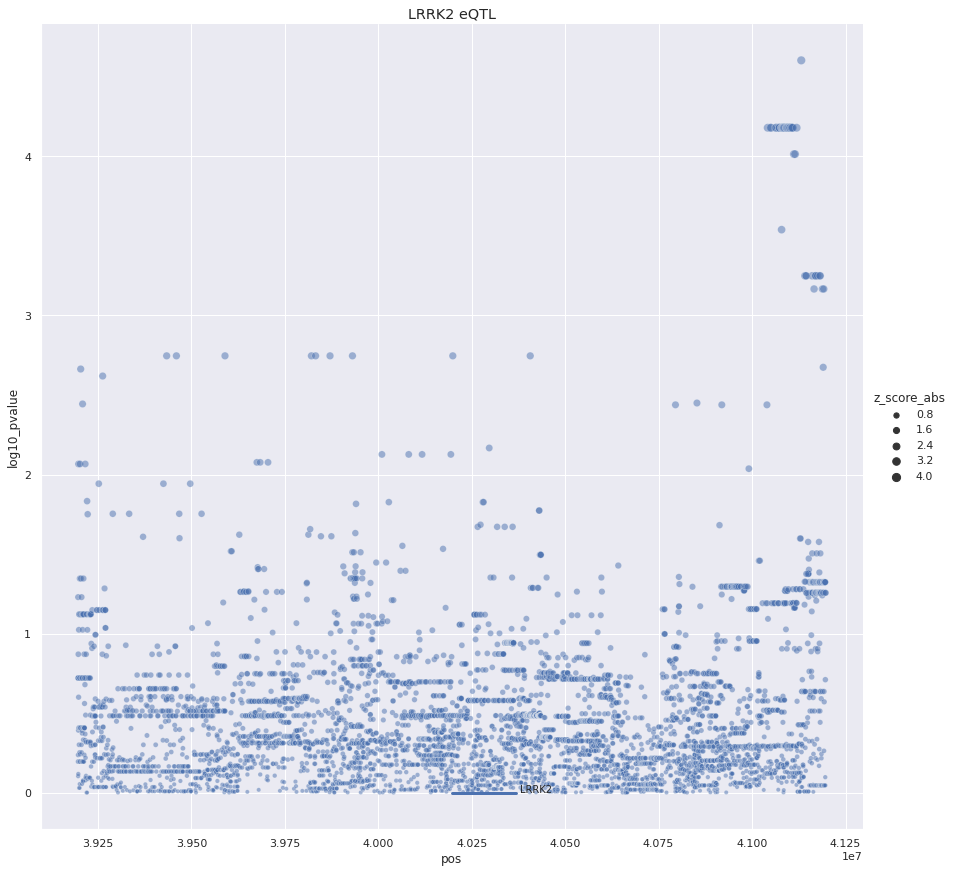

chr14
(7001900, 15)
(6198, 15)
CHURC1 ENSG00000258289.8
gene CHURC1 is on chr14 from 64914361 to 64944591
(6198, 15)


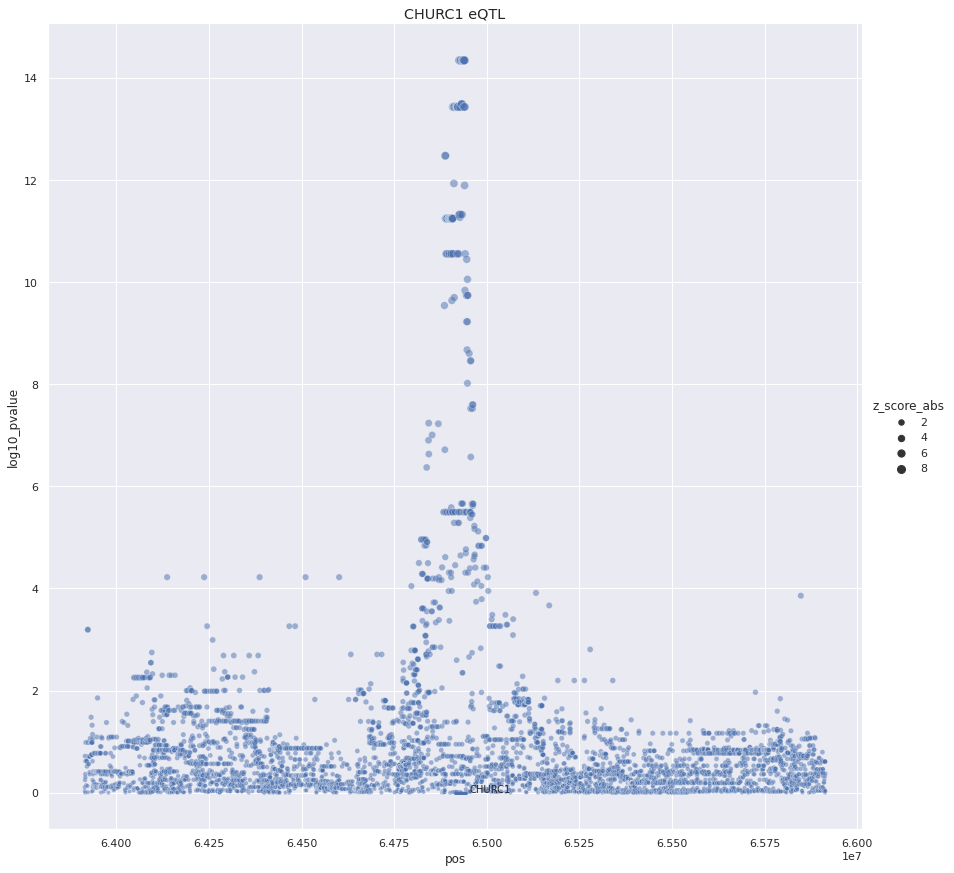

chr17
(10249122, 15)
(5703, 15)
LRRC37A2 ENSG00000238083.7
gene LRRC37A2 is on chr17 from 46511511 to 46555650
(5703, 15)


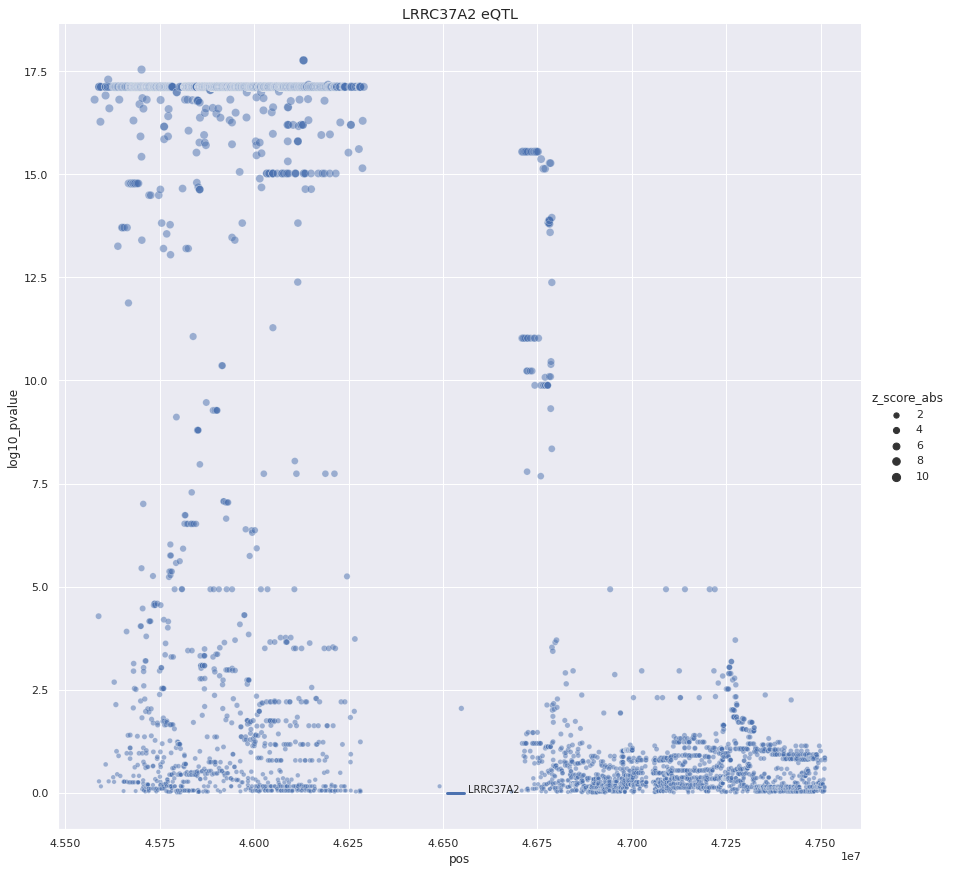

chr17
(10249122, 15)
(5539, 15)
LRRC37A ENSG00000176681.14
gene LRRC37A is on chr17 from 46292733 to 46337794
(5539, 15)


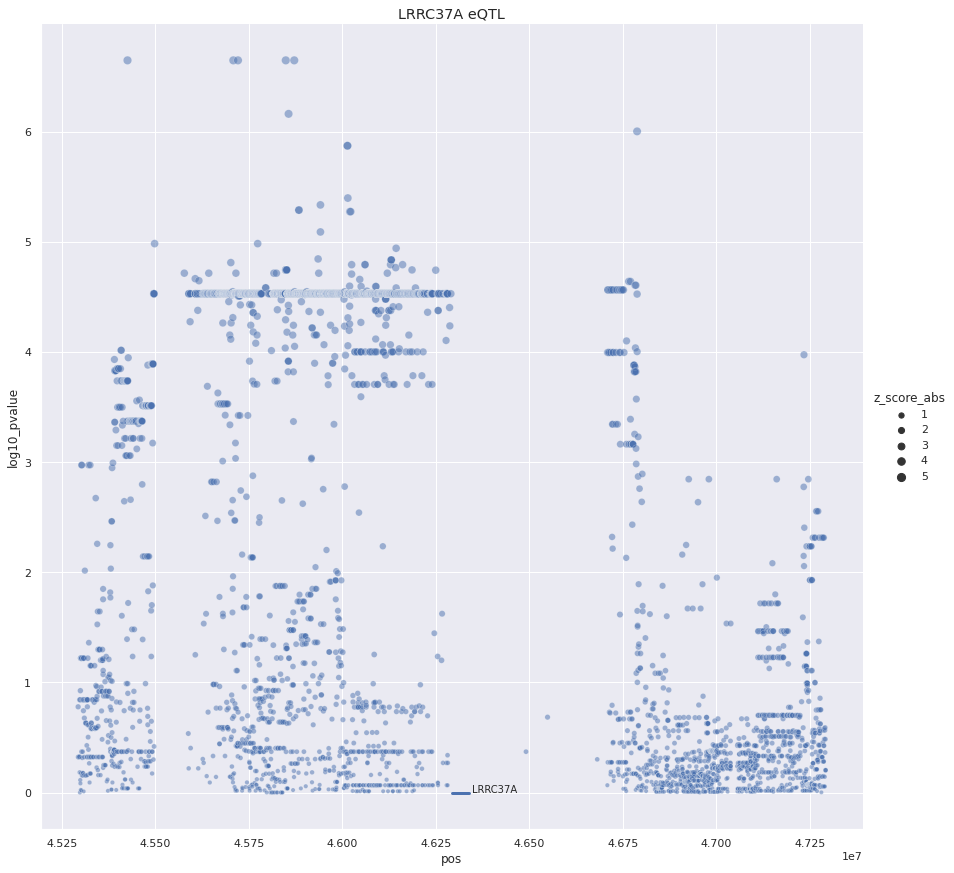

chr17
(10249122, 15)
(5992, 15)
LRRC37A4P ENSG00000214425.7
gene LRRC37A4P is on chr17 from 45506741 to 45550335
(5992, 15)


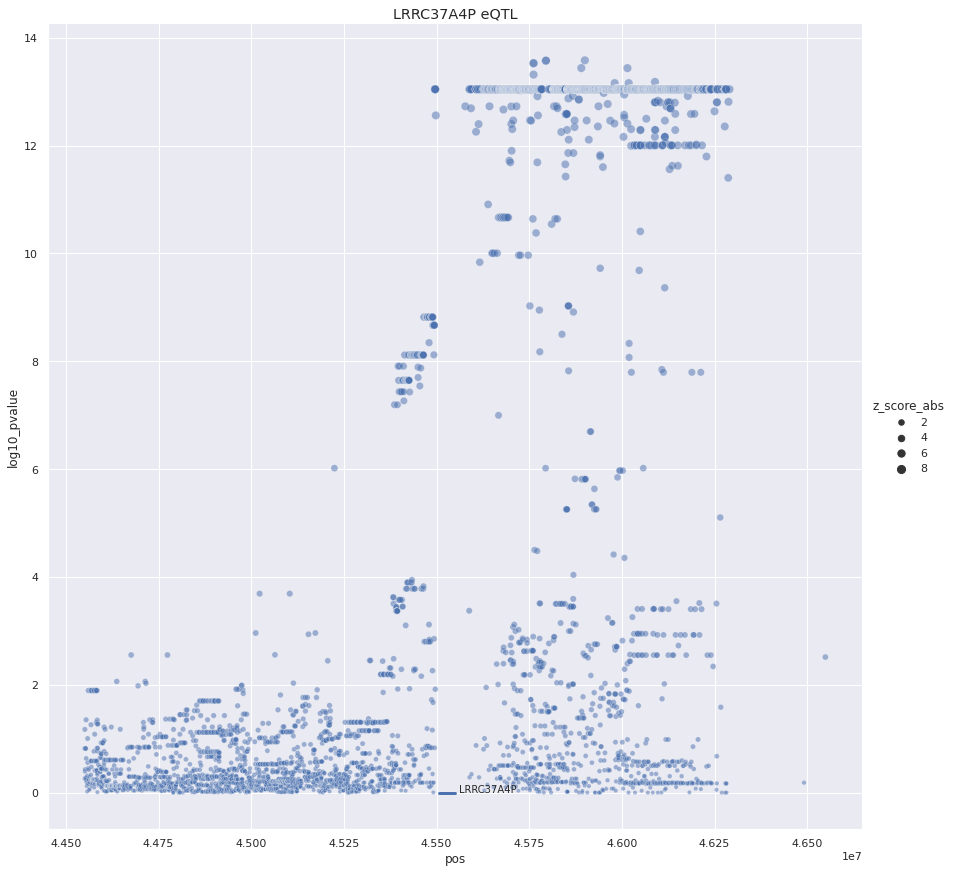

chr17
(10249122, 15)
(5812, 15)
MAPK8IP1P2 ENSG00000263503.1
gene MAPK8IP1P2 is on chr17 from 45600869 to 45602340
(5812, 15)


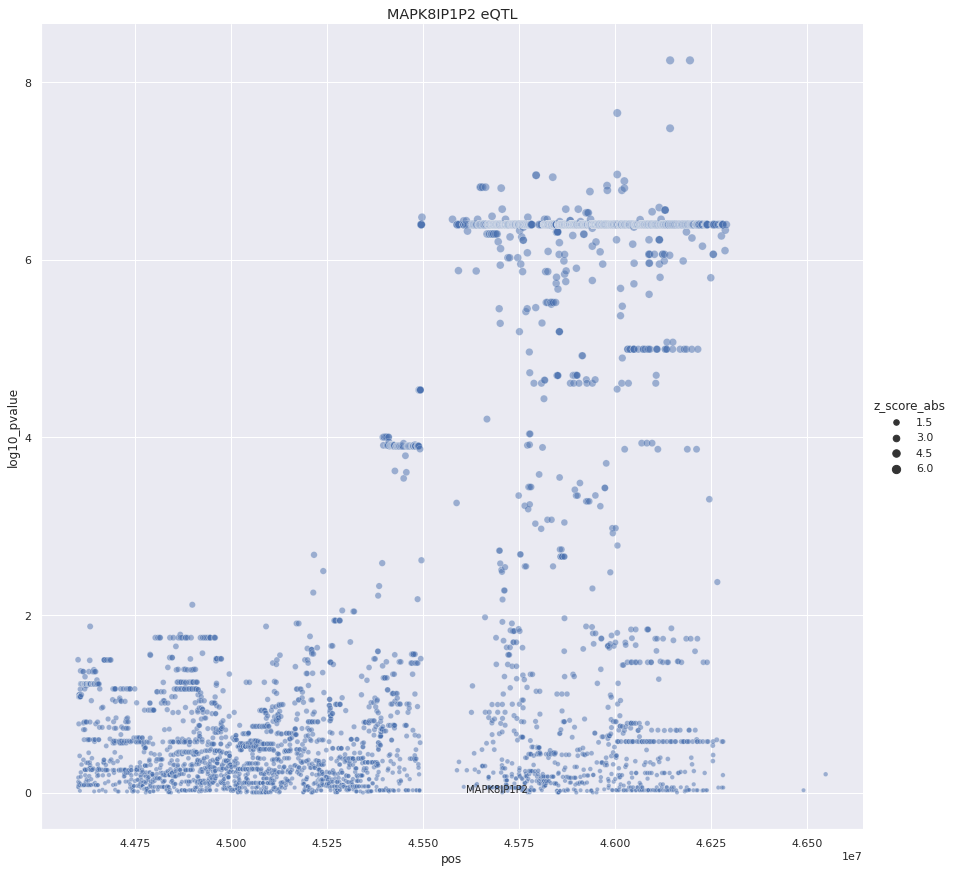

chr17
(10249122, 15)
(6054, 15)
lnc-PLEKHM1-3 lnc_PLEKHM1_3
gene lnc-PLEKHM1-3 is on chr17 from 45507155 to 45520464
(6054, 15)


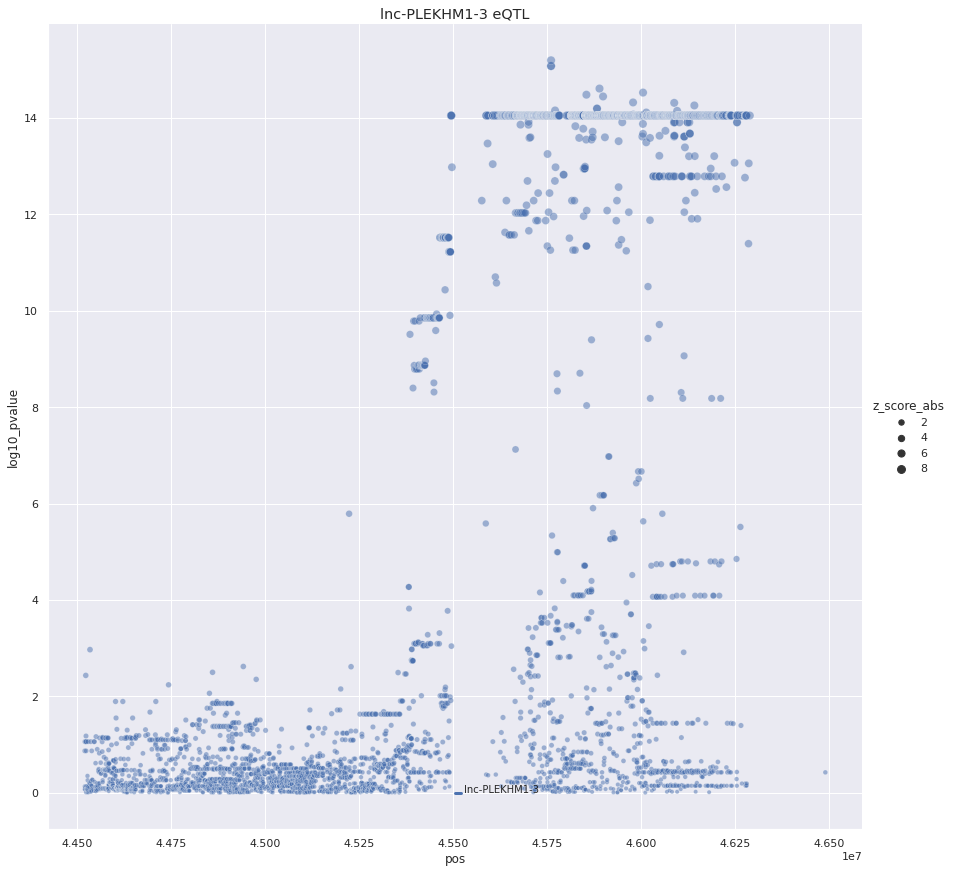

chr17
(10249122, 15)
(6061, 15)
lnc-PLEKHM1-4 lnc_PLEKHM1_4
gene lnc-PLEKHM1-4 is on chr17 from 45515707 to 45516128
(6061, 15)


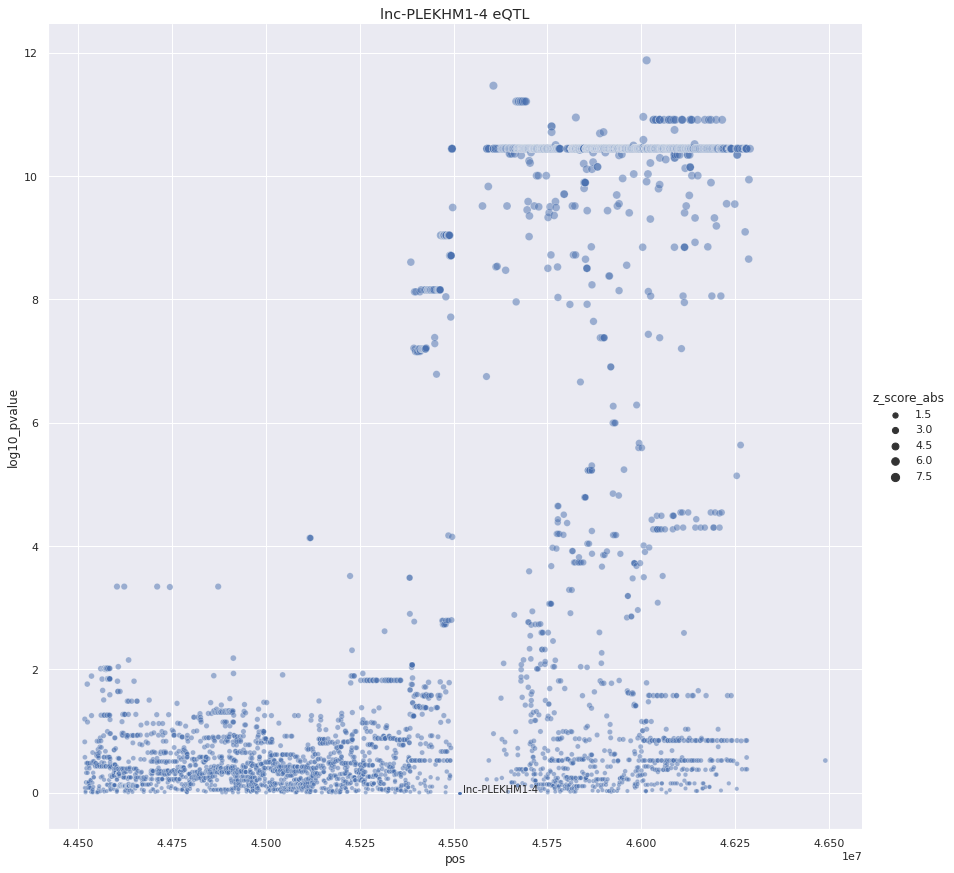

chr17
(10249122, 15)
(5871, 15)
lnc-LINC02210-CRHR1-7 lnc_LINC02210_CRHR1_7
gene lnc-LINC02210-CRHR1-7 is on chr17 from 45585004 to 45588615
(5871, 15)


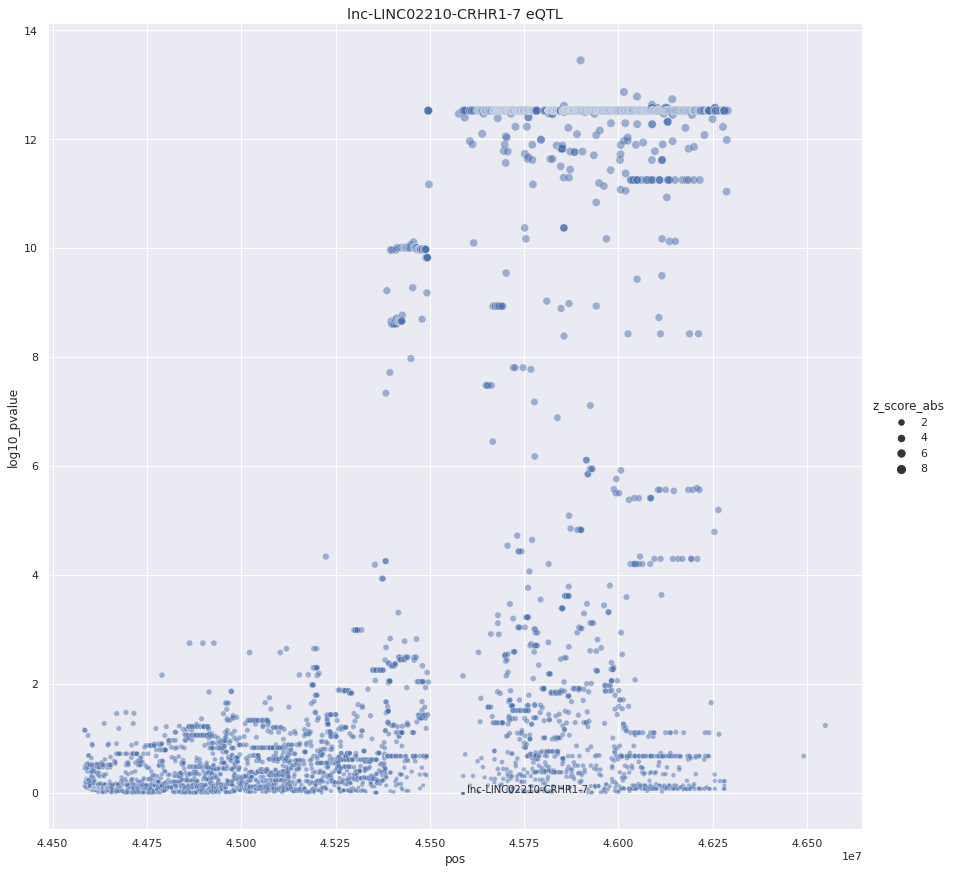

chr17
(10249122, 15)
(5439, 15)
KANSL1-AS1 KANSL1_AS1
gene KANSL1-AS1 is on chr17 from 46193573 to 46196723
(5439, 15)


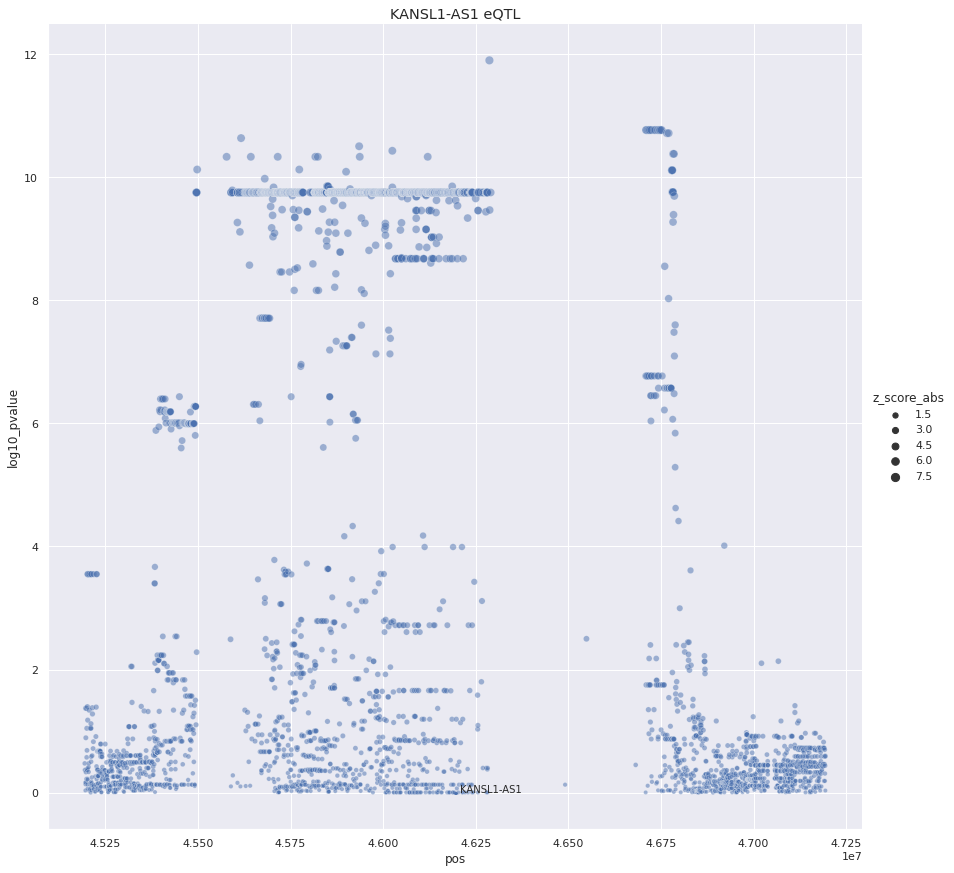

chr17
(10249122, 15)
(5761, 15)
lnc-NSF-2 lnc_NSF_2
gene lnc-NSF-2 is on chr17 from 46543334 to 46545455
(5761, 15)


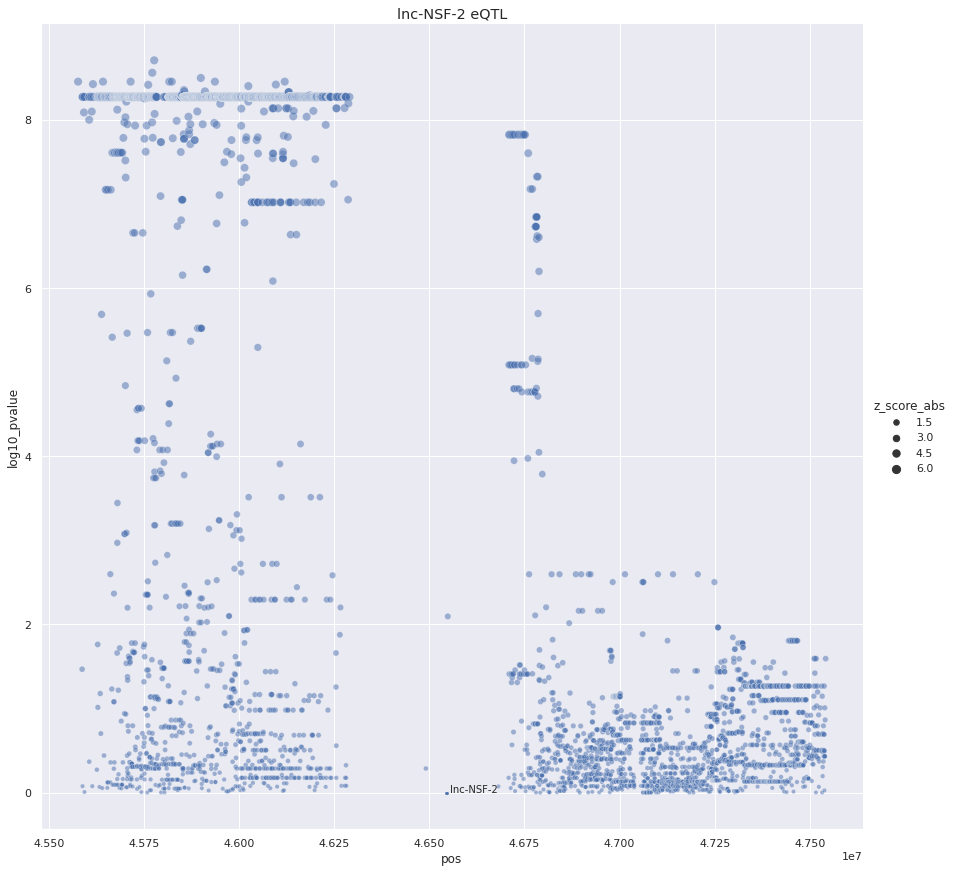

chr18
(3977055, 15)
(6276, 15)
lnc-MRO-2 lnc_MRO_2
gene lnc-MRO-2 is on chr18 from 50877892 to 50878961
(6276, 15)


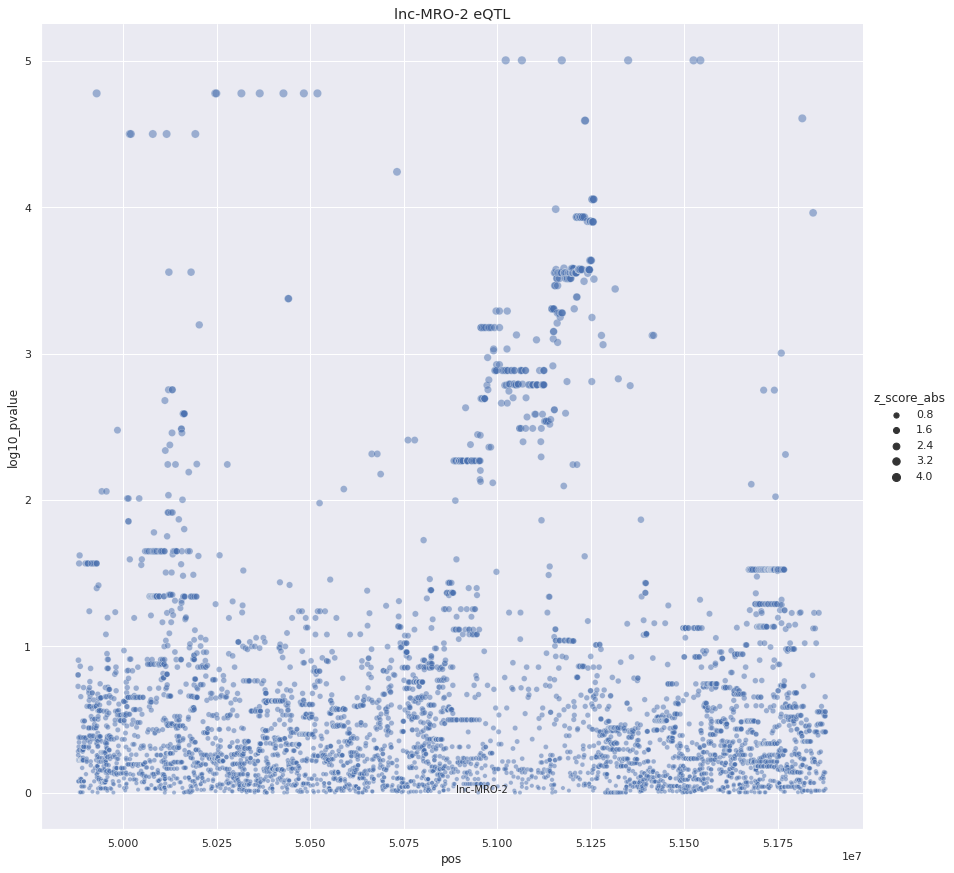

chr1
(17798416, 15)
(3672, 15)
GBA ENSG00000177628.15
gene GBA is on chr1 from 155234452 to 155244699
(3672, 15)


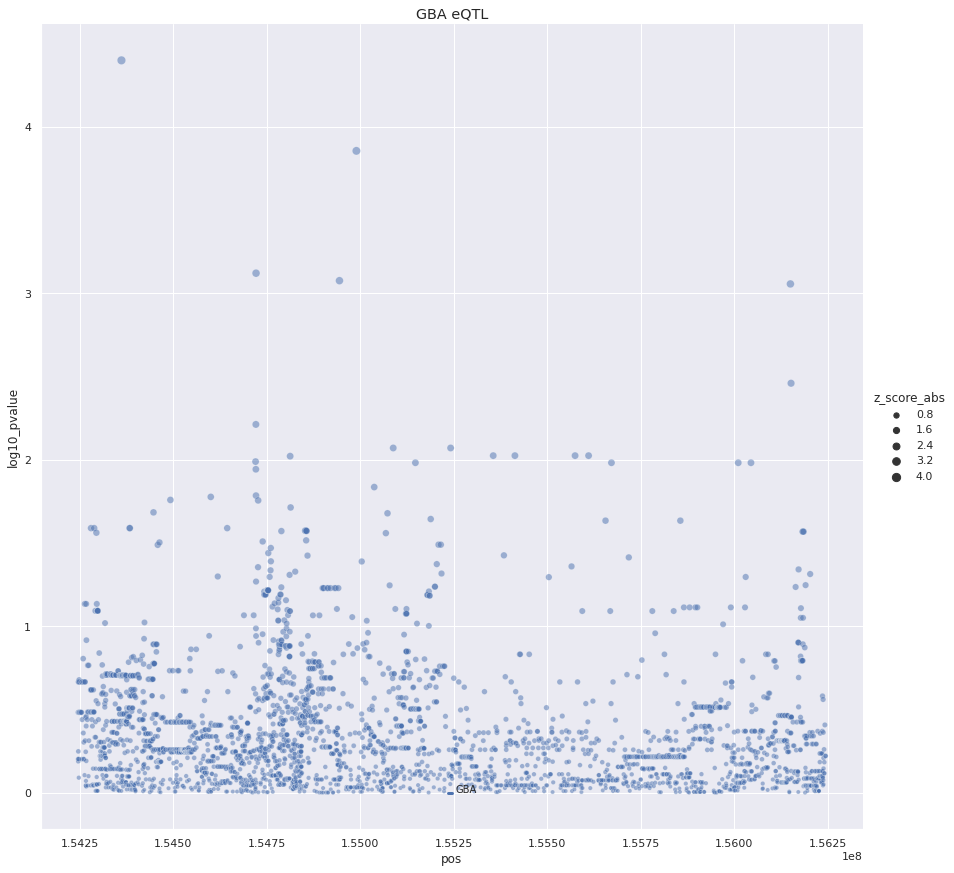

chr1
(17798416, 15)
(5614, 15)
lnc-RHEX-8 lnc_RHEX_8
gene lnc-RHEX-8 is on chr1 from 205862522 to 205896087
(5614, 15)


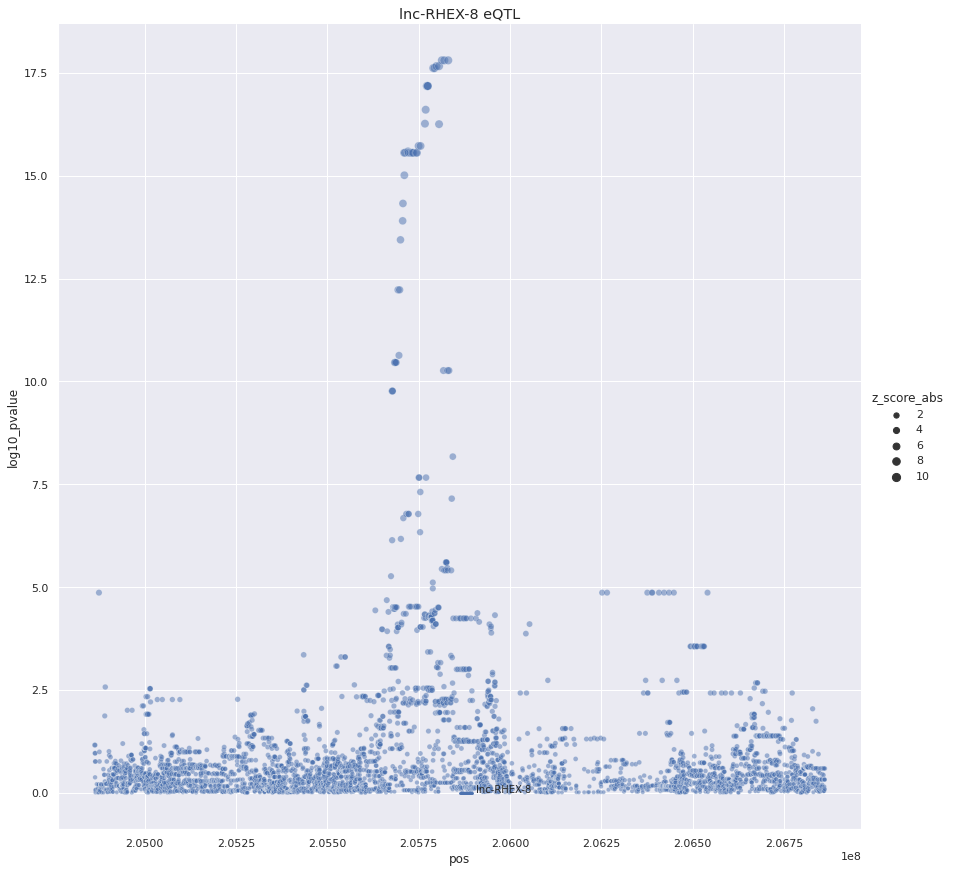

chr3
(11150699, 15)
(5896, 15)
SIAH2 ENSG00000181788.3
gene SIAH2 is on chr3 from 150741127 to 150763477
(5896, 15)


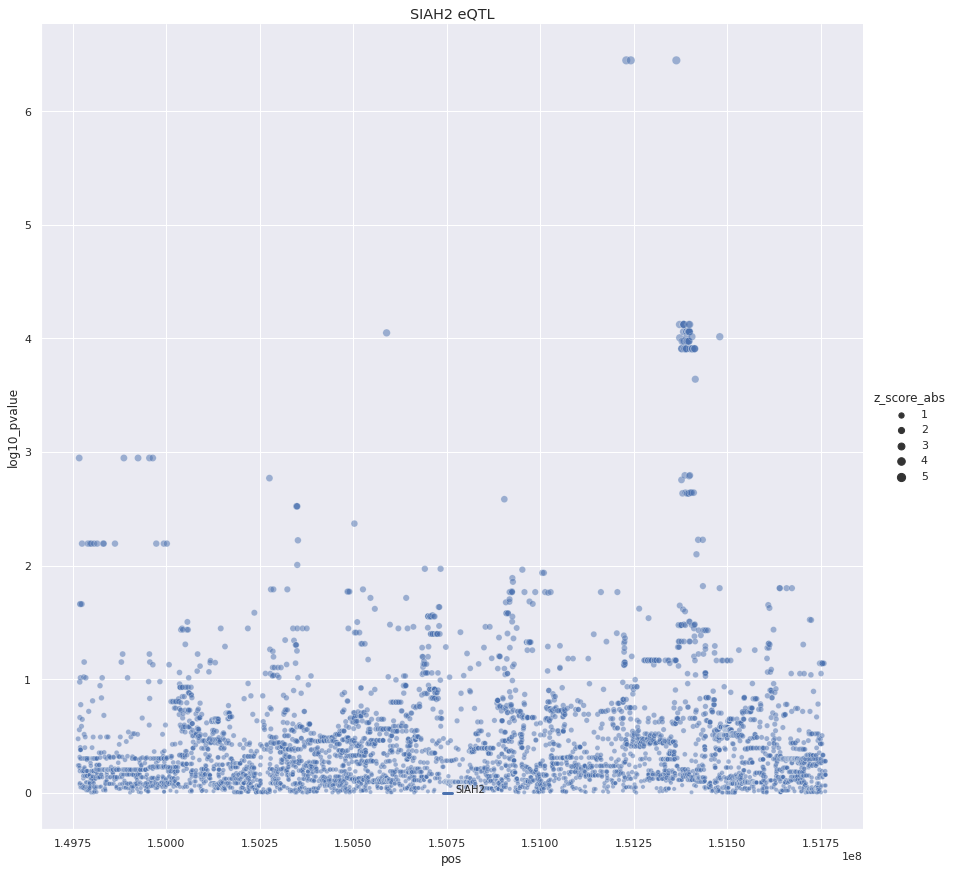

chr4
(8957273, 15)
(7010, 15)
SNCA ENSG00000145335.15
gene SNCA is on chr4 from 89724099 to 89838315
(7010, 15)


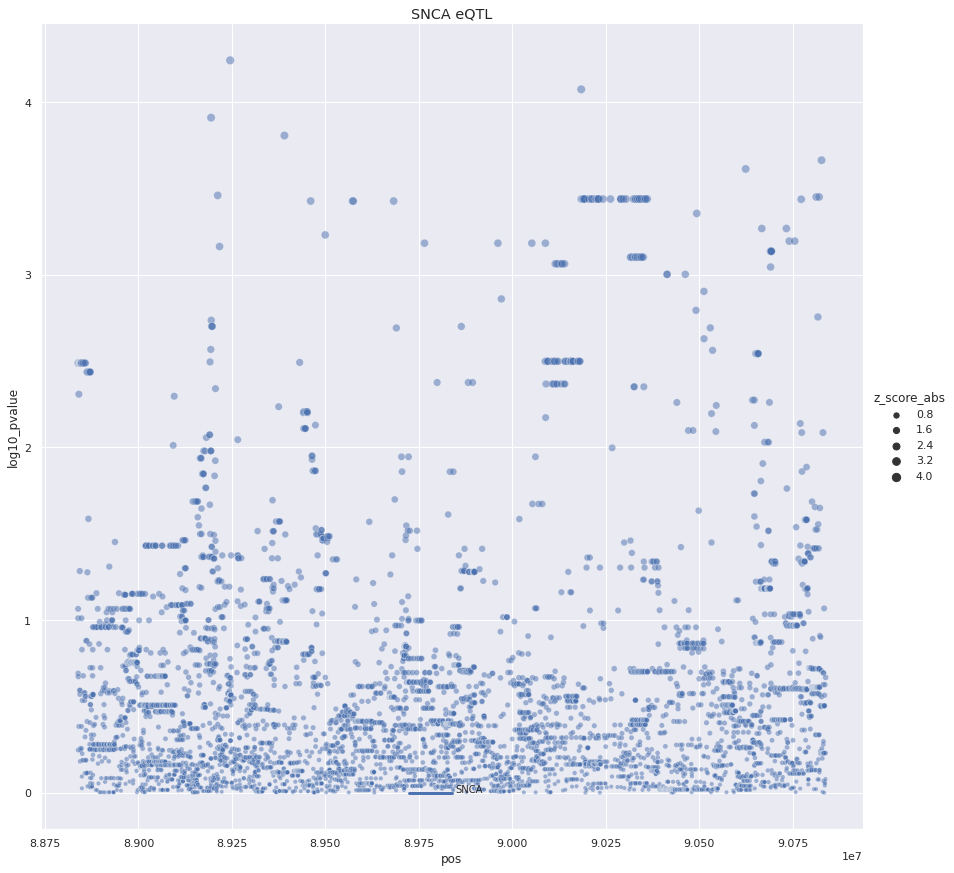

chr5
(9839550, 15)
(5394, 15)
CAMLG ENSG00000164615.4
gene CAMLG is on chr5 from 134738501 to 134752160
(5394, 15)


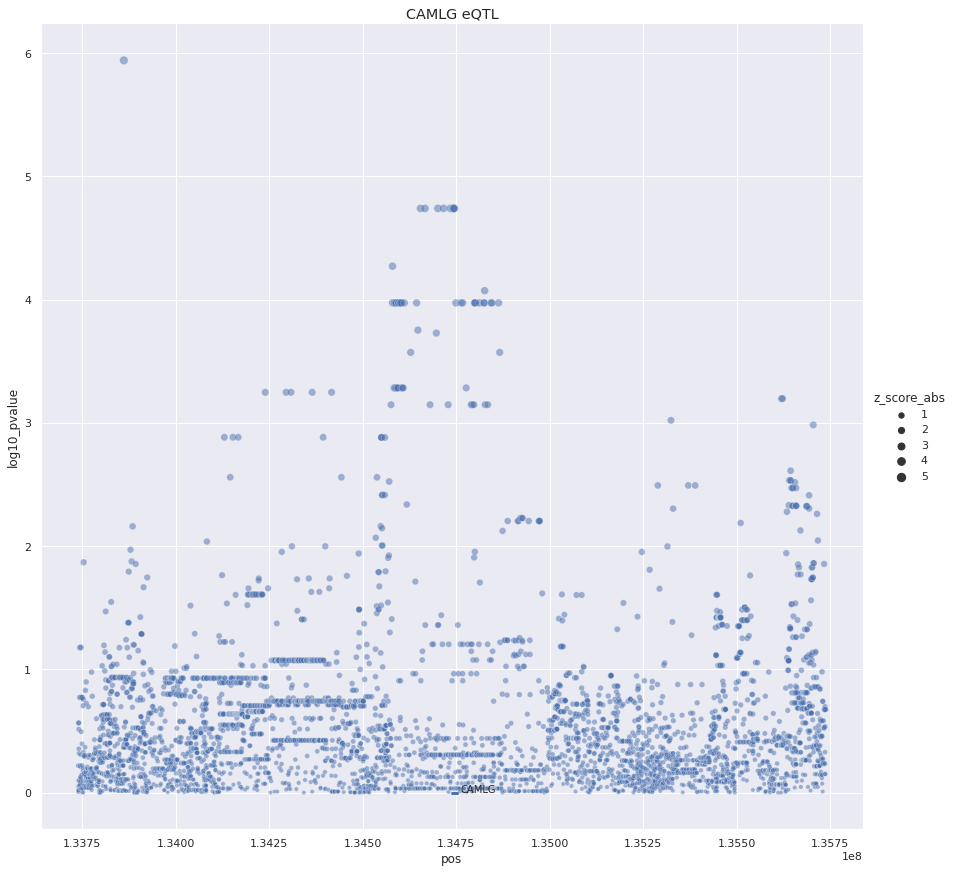

chr5
(9839550, 15)
(6234, 15)
EIF3KP1 ENSG00000175749.11
gene EIF3KP1 is on chr5 from 103032376 to 103033031
(6234, 15)


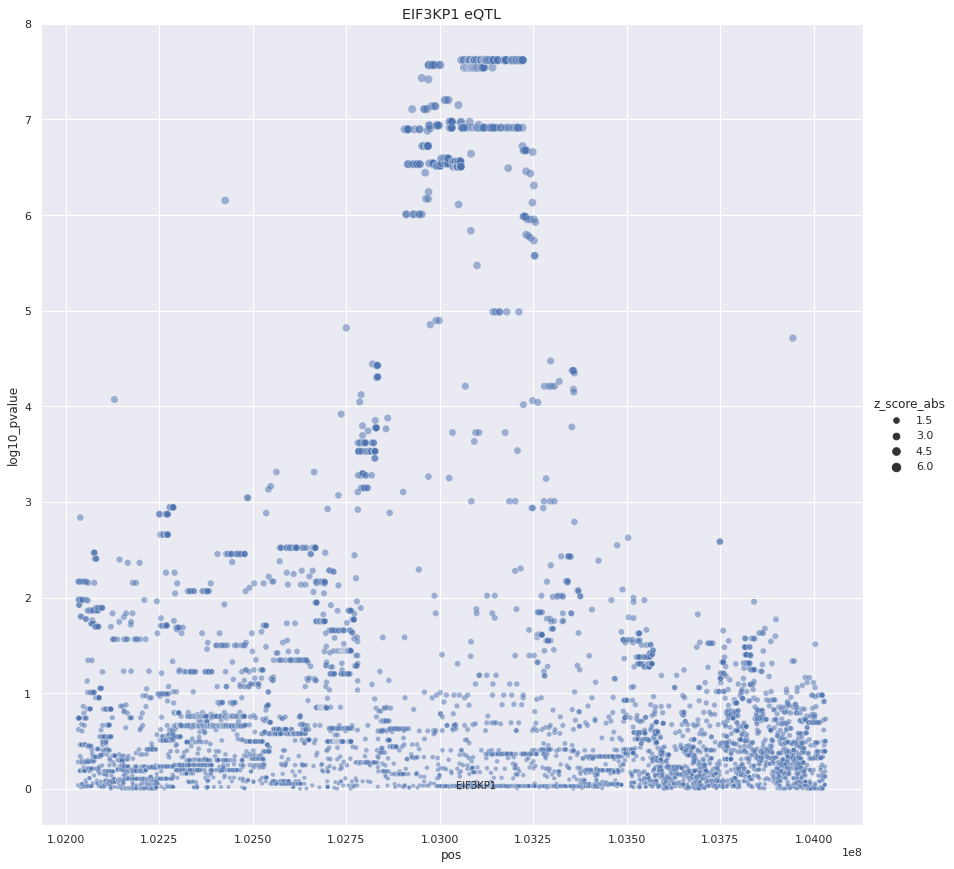

chr7
(9729126, 15)
(6798, 15)
KLHL7-DT KLHL7_DT
gene KLHL7-DT is on chr7 from 23094993 to 23105703
(6798, 15)


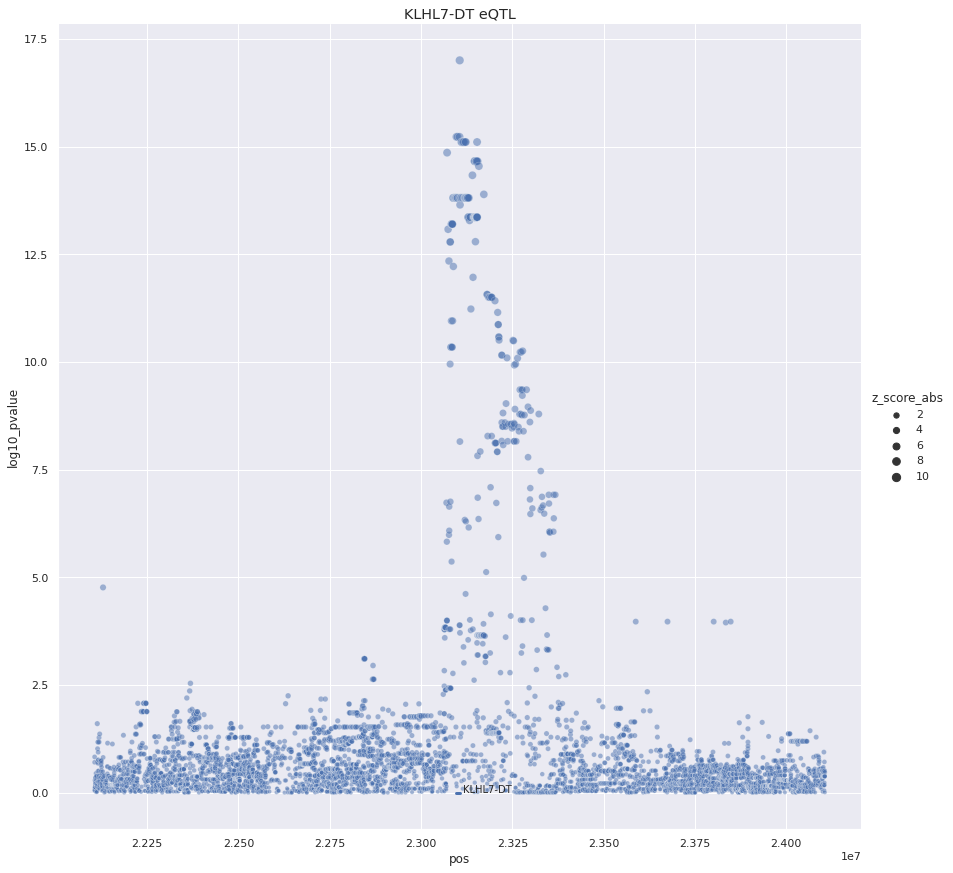

CPU times: user 2min 36s, sys: 36.9 s, total: 3min 13s
Wall time: 2min 45s


In [15]:
%%time

for gene_id in gene_ids:
    gene_df = genes_oi_df.loc[genes_oi_df['gene_id'] == gene_id]
    print(gene_df['seqname'].unique()[0])
    chrom = gene_df['seqname'].unique()[0]
    gene_name = gene_df['gene_name'].unique()[0]
    gene_start = gene_df['start'].min()
    gene_stop = gene_df['end'].max()
    # now load the chromosome eqtl results and extract specific gene results
    chrom_eqtl_df = pd.read_parquet(f'{tensorqtl_dir}/{cohort_build}.cis_qtl_pairs.{chrom}.parquet')
    chrom_bim_df = pd.read_csv(f'{genos_dir}/{cohort_version}.{chrom}.bfile.bim', 
                               header=None, sep='\s+')
    chrom_bim_df.columns = ['chr', 'name', 'cm', 'pos', 'a1', 'a2']
    chrom_eqtl_df = chrom_eqtl_df.merge(chrom_bim_df, how='inner', 
                                    left_on='variant_id', right_on='name')    
    print(chrom_eqtl_df.shape)
    gene_eqtl_df = chrom_eqtl_df.loc[chrom_eqtl_df['phenotype_id'] == gene_id]
    print(gene_eqtl_df.shape)
    plot_eqtl_manhattan(gene_id, gene_name, chrom, gene_start, gene_stop, gene_eqtl_df)